In [1]:
import pandas as pd
from pathlib import Path
import json
import os
import numpy as np
import requests
from dotenv import load_dotenv
import pathlib as path

#Matt's original merge code:

# path to read raw csv data from
bea_path = Path('./BEA/files/data/county_select_change.csv')

#C:/Users/Daniel Quinn/Desktop\Bootcamp\Working_Copy_Project_1\01_MergedData\county_select_change.csv

census_path = Path('./Census/7-17-24 Work/7-18-CSVs/2010_2022_pop_totals_CAGR.csv')
weather_path = Path('./Weather/ranked_disasters_by_year_county.csv')
zillow_path = Path('./Zillow/home_value_CAGR.csv')

# path to save cleaned data to 
save_path = Path('./01_MergedData/data/top_counties.csv')

# csv to pandas df
bea_df = pd.read_csv(bea_path)
census_df = pd.read_csv(census_path)
weather_df = pd.read_csv(weather_path)
zillow_df = pd.read_csv(zillow_path)

census_df = census_df[['GeoFips', 'Total Growth Rate']]
census_df['Total Growth Rate'] = census_df['Total Growth Rate'] * 100
census_df = census_df.sort_values('Total Growth Rate', ascending=False)
census_df = census_df[:300]


bea_df = bea_df.sort_values('2022', ascending=False)[:300]
zillow_df = zillow_df.sort_values('CAGR', ascending=False)[:300]


weather_df = weather_df.rename(columns={'county_fips':'GeoFips'})

zillow_df = zillow_df.rename(columns={'County_State':'GeoName'})
bea_df['GeoName'] = bea_df['GeoName'].apply(lambda x: x.replace('*', '') if '*' in x else x)


zillow_df['GeoName'] = zillow_df['GeoName'].apply(lambda x: x.replace(' County', '') if ' County' in x else x)


print(census_df.columns)

county_zillow = pd.merge(bea_df, zillow_df, on='GeoName').dropna()

print(census_df.head())

merged_df = pd.merge(county_zillow, census_df, on='GeoFips')
merged_df2 = pd.DataFrame(merged_df)
merged_df2.to_csv('C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/merged_df2.csv')
merged_df2.sort_values("Total Growth Rate", ascending = False)

Index(['GeoFips', 'Total Growth Rate'], dtype='object')
     GeoFips  Total Growth Rate
664    48209          70.059755
658    48091          68.804739
699    48257          65.852954
235    19049          62.147232
100    12109          60.378522


,GeoFips,GeoName,2022,CAGR,Total Growth Rate
10,49053,"Washington, UT",0.935540,8.204727,42.779756
22,47187,"Williamson, TN",0.810069,7.320579,41.720325
1,30031,"Gallatin, MT",1.126722,7.792158,39.259185
6,5007,"Benton, AR",1.010989,6.678546,35.877592
4,49049,"Utah, UT",1.048108,6.837103,35.070734
17,16027,"Canyon, ID",0.827298,9.421869,32.538484
13,16055,"Kootenai, ID",0.872608,8.098045,32.164635
21,12035,"Flagler, FL",0.811683,6.634026,32.083438
3,41017,"Deschutes, OR",1.056533,8.269753,30.814977
12,48453,"Travis, TX",0.900560,6.570435,28.679499


In [2]:
#DFQ Initial Sort:

import prophet
import matplotlib
merged_df3 = pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/merged_df2.csv")
initial_df = pd.DataFrame(merged_df3)
initial_df2 = initial_df
del initial_df2["Unnamed: 0"]
del initial_df2["GeoFips"]
initial_df23 = initial_df2.rename(columns = {"GeoName": "County"})
initial_df23

,County,2022,CAGR,Total Growth Rate
0,"Denver, CO",1.342352,6.732323,18.007194
1,"Gallatin, MT",1.126722,7.792158,39.259185
2,"Collier, FL",1.081409,6.919575,23.419708
3,"Deschutes, OR",1.056533,8.269753,30.814977
4,"Utah, UT",1.048108,6.837103,35.070734
5,"Martin, FL",1.012109,7.084390,10.665127
6,"Benton, AR",1.010989,6.678546,35.877592
7,"Palm Beach, FL",0.988132,7.468654,14.741113
8,"Indian River, FL",0.985924,6.921889,21.034513
9,"Boulder, CO",0.957125,6.441268,10.943672


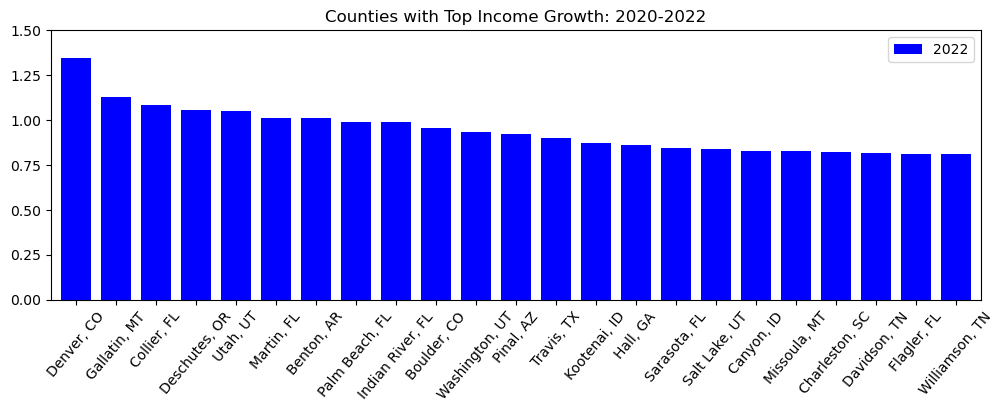

In [3]:
#Graphing income growth only:

income_growth = initial_df2.groupby('GeoName').mean()
top_20_income = income_growth.sort_values(by='2022', ascending=False)

income_all_chart = top_20_income.plot.bar(y="2022", rot=50, width=.75, figsize=(12,3.5), ylim=(0,1.5),
                         title="Counties with Top Income Growth: 2020-2022",
                         yticks=[0,.25,.5,.75,1,1.25,1.5], xlabel='', color='blue')

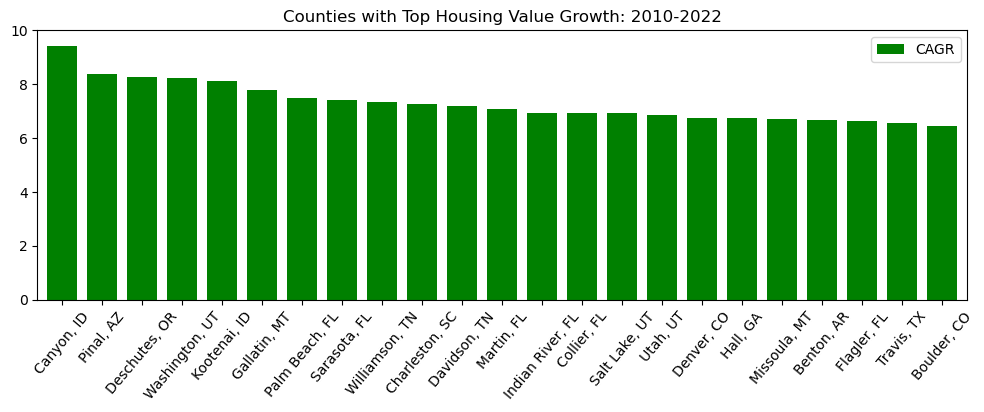

In [4]:
#Graphing housing growth only:

housing_growth = initial_df2.groupby('GeoName').mean()
top_20_housing = housing_growth.sort_values(by='CAGR', ascending=False)

housing_all_chart = top_20_housing.plot.bar(y="CAGR", rot=50, width=.75, figsize=(12,3.5), ylim=(0,10),
                         title="Counties with Top Housing Value Growth: 2010-2022",
                         yticks=[0,2,4,6,8,10], xlabel='', color='green')

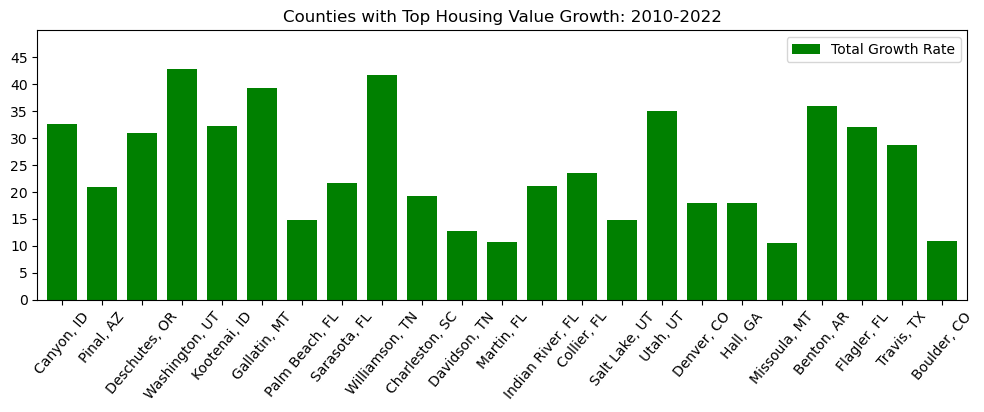

In [5]:
#Graphing population growth only:

pop_growth = initial_df2.groupby('GeoName').mean()
top_20_pop = housing_growth.sort_values(by='Total Growth Rate', ascending=True)

housing_all_chart = top_20_housing.plot.bar(y="Total Growth Rate", rot=50, width=.75, figsize=(12,3.5), ylim=(0,50),
                         title="Counties with Top Housing Value Growth: 2010-2022",
                         yticks=[0,5,10,15,20,25,30,35,40,45], xlabel='', color='green')

In [6]:
#Initial set up for the poverty df
poverty=pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/Census/7-17-24 Work/7-18-CSVs/combined_poverty_2022.csv")
poverty_df=pd.DataFrame(poverty)
del poverty_df["Unnamed: 0"]
filtered_poverty_df = poverty_df[~poverty_df["County"].str.contains("Puerto Rico")]
filtered_poverty_df.sort_values("2022 Poverty Rate", ascending=True)

,County,Total Population,Est. Pop Below Poverty Level,2022 Poverty Rate,GEO_ID
280,"Oldham County, Kentucky",65172,1819,2.791076,0500000US21185
172,"Forsyth County, Georgia",265881,8248,3.102140,0500000US13117
92,"Douglas County, Colorado",374401,11640,3.108966,0500000US08035
309,"Calvert County, Maryland",94173,3251,3.452157,0500000US24009
434,"Hunterdon County, New Jersey",127614,4584,3.592082,0500000US34019
...,...,...,...,...,...
161,"Clarke County, Georgia",120046,35526,29.593656,0500000US13059
167,"Dougherty County, Georgia",79563,23582,29.639405,0500000US13095
296,"St. Landry Parish, Louisiana",80733,24088,29.836622,0500000US22097
449,"McKinley County, New Mexico",69029,23135,33.514900,0500000US35031


In [7]:
final_afford_df = initial_df23.merge(filtered_poverty_df, on='County')
final_afford_df

,County,2022,CAGR,Total Growth Rate,Total Population,Est. Pop Below Poverty Level,2022 Poverty Rate,GEO_ID


In [8]:
#Initial set up for the housing affordability df
housing=pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/Census/7-17-24 Work/7-18-CSVs/housing_affordability_2022.csv")
housing_df=pd.DataFrame(housing)
del housing_df["Unnamed: 0"]
filtered_housing_df = housing_df[~poverty_df["County"].str.contains("Puerto Rico")]
filtered_housing_df.sort_values("County", ascending=True)
filtered_housing_df.to_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/Census/7-17-24 Work/7-18-CSVs/filtered_housing_2022.csv")
filtered_housing_df.sort_values("County", ascending=True)

C:\Users\Daniel Quinn\AppData\Local\Temp\ipykernel_29852\4196222104.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_housing_df = housing_df[~poverty_df["County"].str.contains("Puerto Rico")]


,County,Total Owner-Occupied Units,Mort=Y,Mort=N,Mort/Income <10%,Mort/Income 10-14.9%,Mort/Income 15-19.9%,Mort/Income 20-24.9%,Mort/Income 25-29.9%,Mort/Income 30-34.9%,Mort/Income 35-39.9%,Mort/Income 40-49.9%,Mort/Income >=50%,GEO_ID
195,"Ada County, Idaho",144331,99035,12378,18675,20219,15356,8685,5983,4629,4202,8604,304,0500000US16001
86,"Adams County, Colorado",134864,97042,4728,16321,18315,14234,11897,8620,4904,7541,10482,0,0500000US08001
602,"Adams County, Pennsylvania",31086,18639,1718,3410,4037,2905,1988,1075,702,1146,1574,84,0500000US42001
645,"Aiken County, South Carolina",55033,30227,3950,7405,4998,4607,2307,1533,552,1598,3224,53,0500000US45003
111,"Alachua County, Florida",62968,37339,2630,7537,9136,3835,3383,2686,1269,2814,3993,56,0500000US12001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,"York County, Pennsylvania",139723,88881,9009,17429,18335,12514,8925,7377,3848,3568,7382,494,0500000US42133
665,"York County, South Carolina",84255,58090,7988,13023,11510,8525,5594,2895,1334,2889,4332,0,0500000US45091
771,"York County, Virginia",20959,15480,1724,3526,2907,2585,2635,897,248,402,495,61,0500000US51199
85,"Yuba County, California",19487,13528,507,1242,2922,2169,912,1085,621,1616,2319,135,0500000US06115


In [9]:
filtered_housing = pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/Census/7-17-24 Work/7-18-CSVs/filtered_housing_2022.csv")
filtered_df = pd.DataFrame(filtered_housing)
initial_df23['County'] = initial_df23['County'].astype(str)
filtered_housing_df['County'] = filtered_housing_df['County'].astype(str)

# Merge the DataFrames on the 'County' column
final_afford_df = initial_df23.merge(filtered_housing_df, on="County")

# Print the merged DataFrame
print(final_afford_df)


#final_afford_df = initial_df23.merge(filtered_df)
#final_afford_df

#final_afford_df = filtered_housing_df.merge(renam_initial_df2, on="County")
#final_afford_df

Empty DataFrame
Columns: [County, 2022, CAGR, Total Growth Rate, Total Owner-Occupied Units, Mort=Y, Mort=N, Mort/Income <10%, Mort/Income 10-14.9%, Mort/Income 15-19.9%, Mort/Income 20-24.9%, Mort/Income 25-29.9%, Mort/Income 30-34.9%, Mort/Income 35-39.9%, Mort/Income 40-49.9%, Mort/Income >=50%, GEO_ID]
Index: []


C:\Users\Daniel Quinn\AppData\Local\Temp\ipykernel_29852\2253001810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_housing_df['County'] = filtered_housing_df['County'].astype(str)
